In [4]:
import pandas as pd

df = pd.read_csv("ultra_sonic.csv",names=["time", "distance"])
df.head()

,time,distance
0,2023/03/11 16:11:54,Distance: 1201.36
1,2023/03/11 16:11:55,Distance: 1201.01
2,2023/03/11 16:11:56,Distance: 1200.92
3,2023/03/11 16:11:57,Distance: 1201.24
4,2023/03/11 16:11:58,Distance: 1200.99


In [5]:
df["distance"] = df["distance"].str.replace("Distance: ","")
df.head()

,time,distance
0,2023/03/11 16:11:54,1201.36
1,2023/03/11 16:11:55,1201.01
2,2023/03/11 16:11:56,1200.92
3,2023/03/11 16:11:57,1201.24
4,2023/03/11 16:11:58,1200.99


In [6]:
df["distance"] = df["distance"].astype(float)
df.head()

,time,distance
0,2023/03/11 16:11:54,1201.36
1,2023/03/11 16:11:55,1201.01
2,2023/03/11 16:11:56,1200.92
3,2023/03/11 16:11:57,1201.24
4,2023/03/11 16:11:58,1200.99


In [7]:
df['time'] = pd.to_datetime(df['time'])
df.head()

,time,distance
0,2023-03-11 16:11:54,1201.36
1,2023-03-11 16:11:55,1201.01
2,2023-03-11 16:11:56,1200.92
3,2023-03-11 16:11:57,1201.24
4,2023-03-11 16:11:58,1200.99


In [8]:
df.describe()

,distance
count,22.000000
mean,1200.981364
std,0.210267
min,1200.720000
25%,1200.795000
50%,1200.960000
75%,1201.115000
max,1201.360000


<AxesSubplot: xlabel='time', ylabel='distance'>

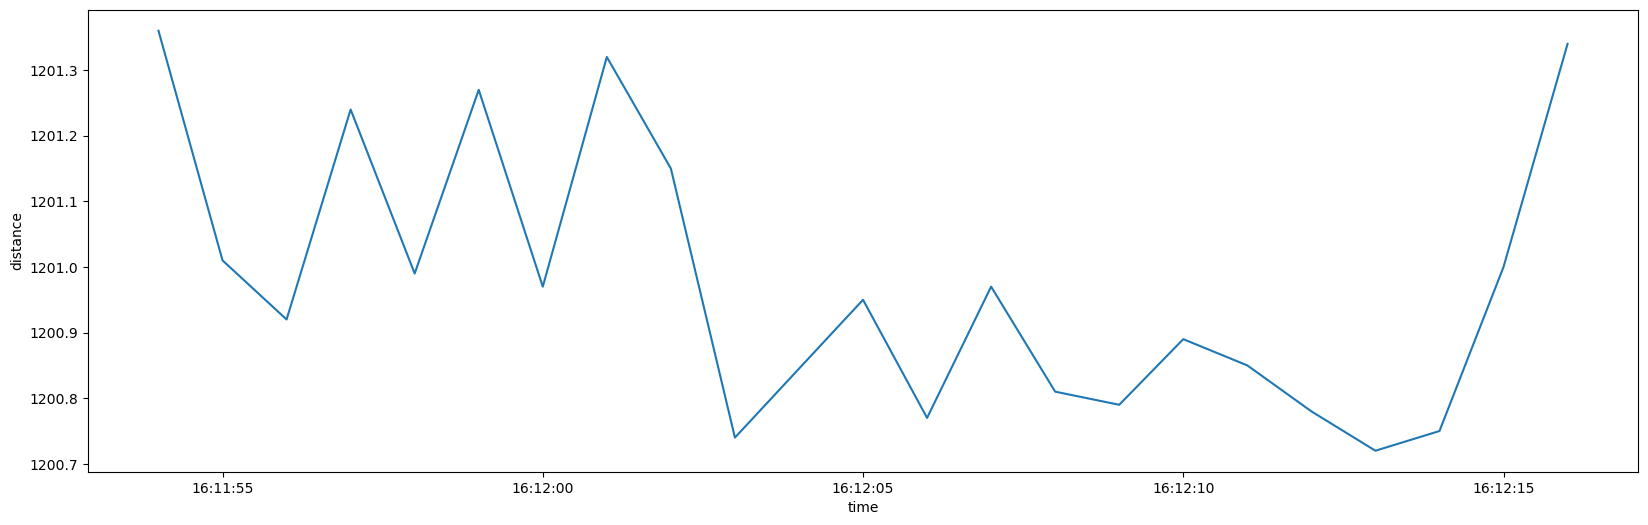

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.lineplot(x='time', y='distance', data=df[:])

# グラフを表示する


<AxesSubplot: xlabel='time', ylabel='distance'>

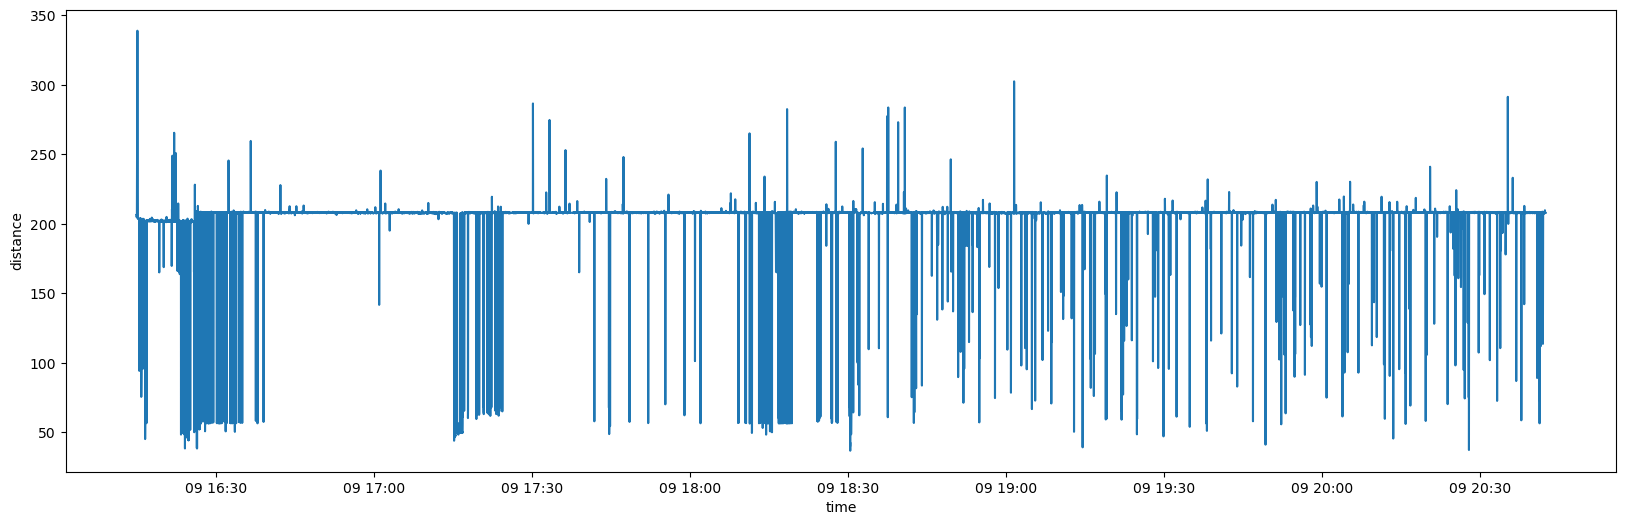

In [33]:
mean = df['distance'].mean()
std = df['distance'].std()

# 平均値との差が標準偏差の3倍以内だったデータのみを抽出し、clead_dfに格納
clean_df = df[abs(df['distance'] - mean) <= 3 * std]

plt.figure(figsize=(20, 6))
sns.lineplot(x='time', y='distance', data=clean_df)

In [34]:
clean_df.describe()

,distance
count,15721.000000
mean,203.088397
std,26.053118
min,36.880000
25%,207.900000
50%,208.030000
75%,208.300000
max,338.960000


/var/folders/x2/kjy714xd4m19fcwxlys6b29c0000gn/T/ipykernel_14432/2524824292.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["distance"], hist=True, label='distance')


<AxesSubplot: xlabel='distance', ylabel='Density'>

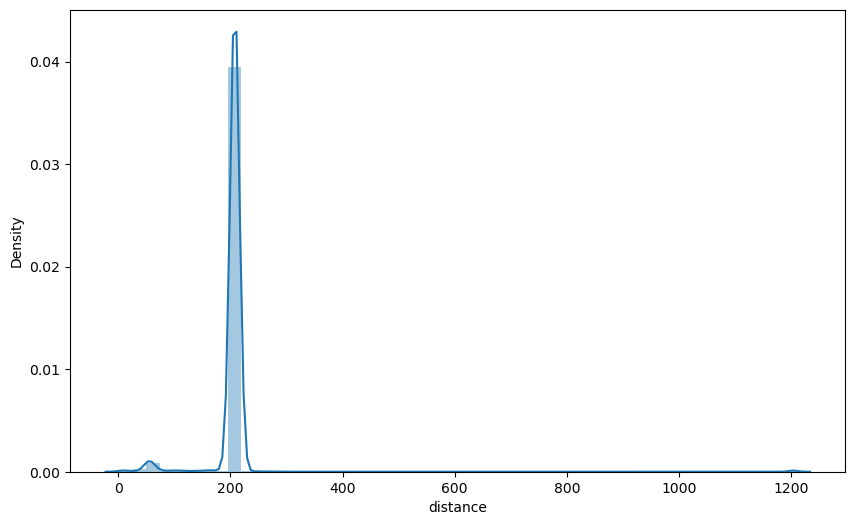

In [37]:
plt.figure(figsize=(10, 6))
sns.distplot(df["distance"], hist=True, label='distance')

/var/folders/x2/kjy714xd4m19fcwxlys6b29c0000gn/T/ipykernel_14432/1154882657.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clean_df["distance"], bins=20, kde=True)


<AxesSubplot: xlabel='distance', ylabel='Density'>

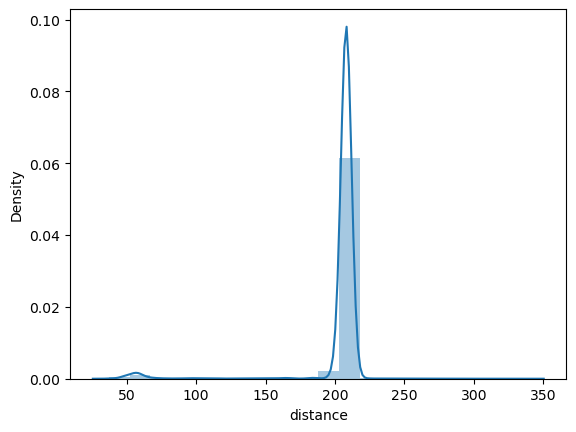

In [44]:
sns.distplot(clean_df["distance"], bins=20, kde=True)
